### Importing necessary libraries

In [1]:
# import packages
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import statistics
from scipy.stats import pearsonr
from scipy import stats
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

C:\Users\veoni\anaconda3\envs\HOPLAB\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Importing the data

In [2]:
# use a personal style sheet
plt.style.use("./styles/mystyle.mplstyle")
# Getting the clean dataset that is given by statistical Plan.ipynb
df = pd.read_csv("DF_cleaned.csv")
n = len(set(df.pt_num))
df_correct =  df[df['acc'] == True]

###  the effect of SOA, difficulty of occlusion, and size of occlusion.

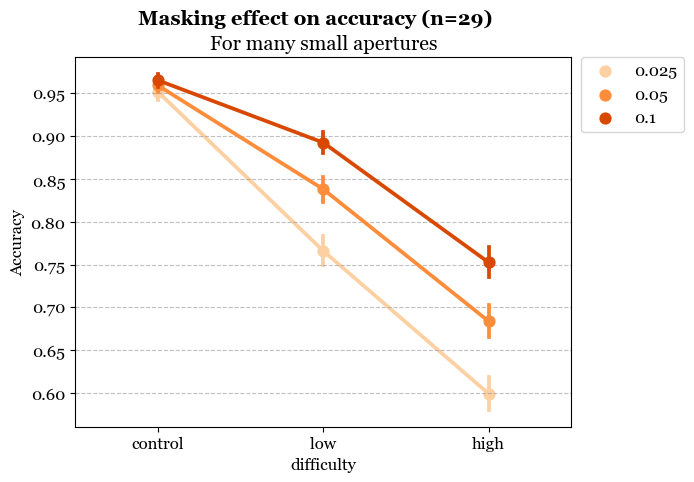

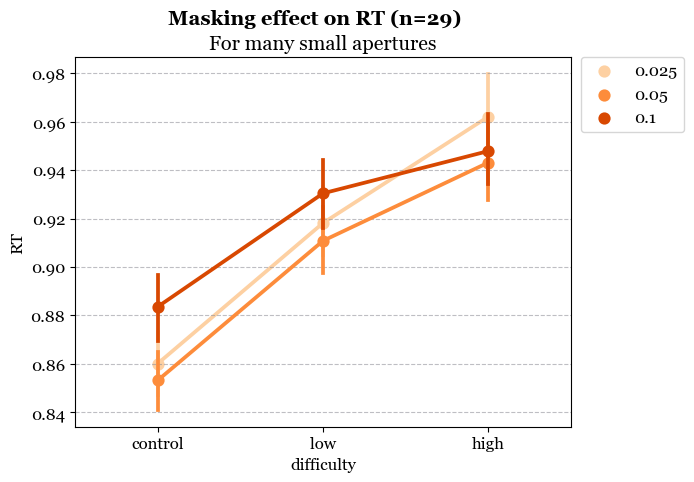

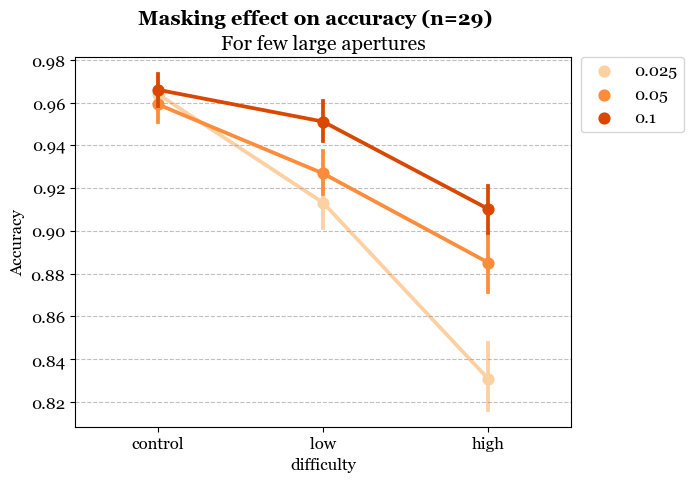

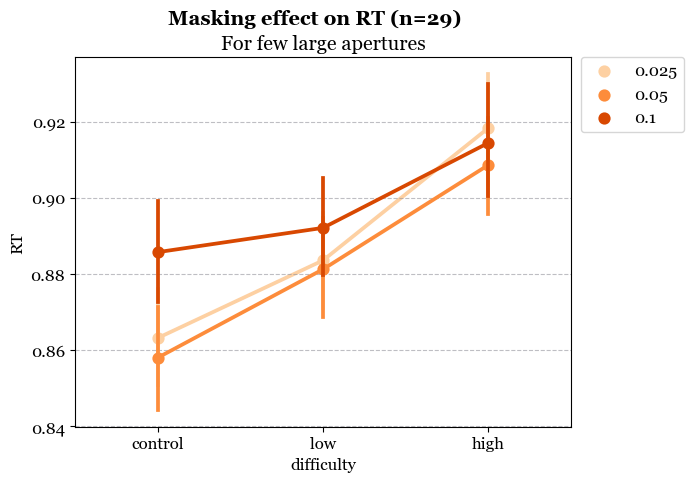

In [3]:
# checking the effect of masking
# for each occluder size separately
for so in set(df['size_occl']):
    # for each measure of performance separately
    for dv in ['acc', 'rt']:
        if dv == 'rt':
            data = df.loc[df['acc']] # only take correct trials for RT
        elif dv == 'acc':
            data = df
        plt.figure()
        plot = sns.pointplot(
            data = data.loc[data['size_occl']==so],
            y = dv,
            x = 'difficulty',
            order = ['control', 'low', 'high'],
            hue = 'soa',
            palette = 'Oranges',
            join = True
        )
        if dv == 'acc':
            # plt.ylim(0.6, 1)
            plt.ylabel("Accuracy")
            plt.suptitle("Masking effect on accuracy (n={})".format(n))
        elif dv == 'rt':
            # plt.ylim(900, 1200)
            plt.ylabel("RT")
            plt.suptitle("Masking effect on RT (n={})".format(n))
        plt.title('For {} apertures'.format(so))
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.show()

## Same plots only everything is in one figure

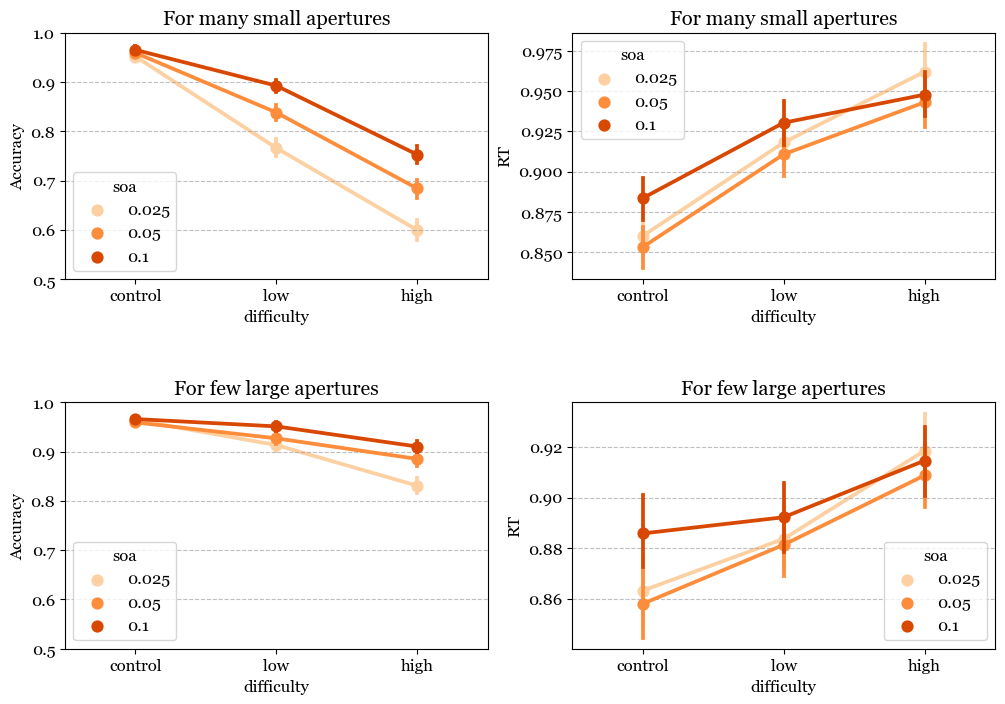

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure and axes
fig, axes = plt.subplots(nrows=len(set(df['size_occl'])), ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# checking the effect of masking
# for each occluder size separately
for i, so in enumerate(set(df['size_occl'])):
    # for each measure of performance separately
    for j, dv in enumerate(['acc', 'rt']):
        if dv == 'rt':
            data = df.loc[df['acc']] # only take correct trials for RT
        elif dv == 'acc':
            data = df
        ax = axes[i, j]
        plot = sns.pointplot(
            data=data.loc[data['size_occl'] == so],
            y=dv,
            x='difficulty',
            order=['control', 'low', 'high'],
            hue='soa',
            palette='Oranges',
            join=True,
            ax=ax
        )
        if dv == 'acc':
            ax.set_ylim(0.5, 1)
            ax.set_ylabel("Accuracy")
            ax.set_title("Masking effect on accuracy (n={})".format(n))
        elif dv == 'rt':
            #ax.set_ylim(900, 1200)
            ax.set_ylabel("RT")
            ax.set_title("Masking effect on RT (n={})".format(n))
        ax.set_title('For {} apertures'.format(so))
        #ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Show the single figure with all the plots
plt.show()


### Checking the effect of category on experiment (RT & ACC)

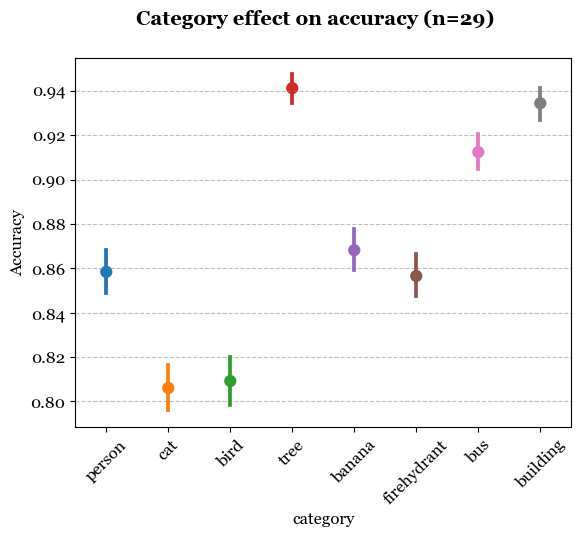

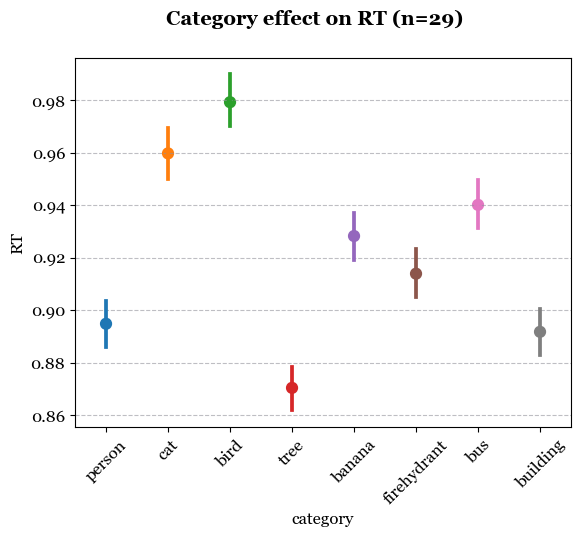

In [5]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'category',
        order = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
        # hue = 'soa',
        # hue = 'size_occl',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Category effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Category effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

### Checking the effect of keys on experiment (RT & ACC)

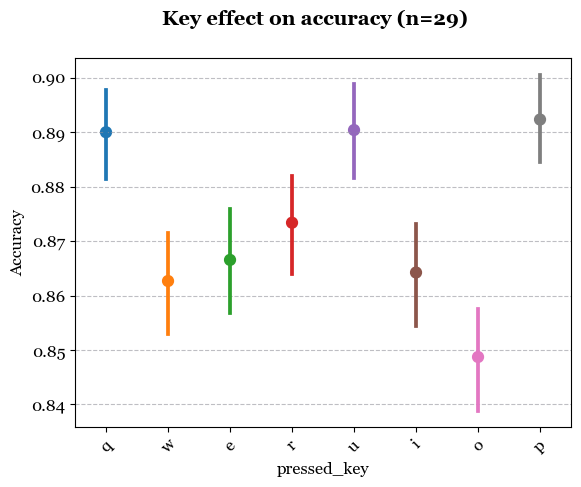

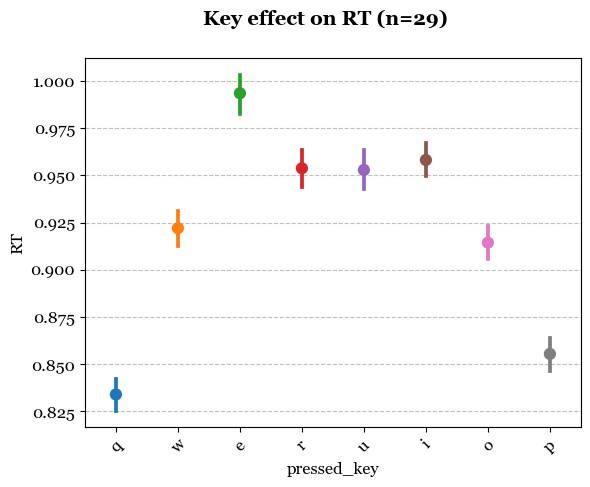

In [6]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'pressed_key',
        order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

### Checking the effect of block whether participants accuracy and reaction time depends on the block number

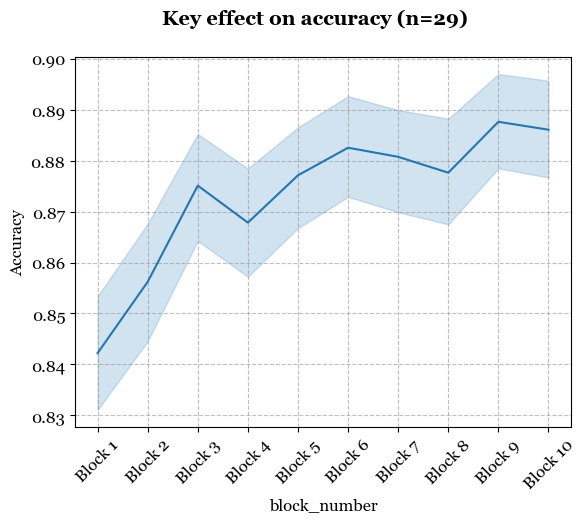

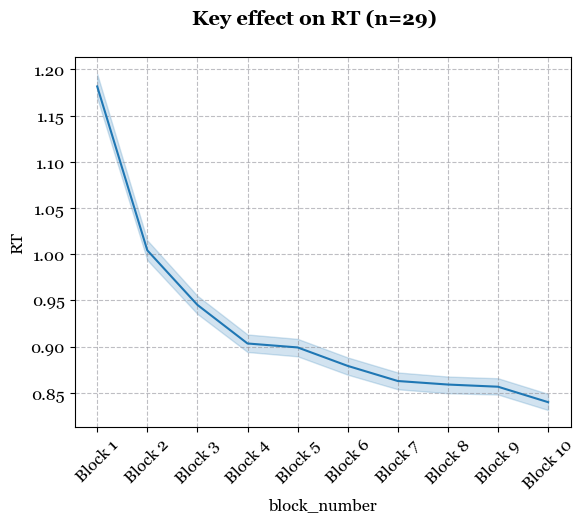

In [7]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.lineplot(
        data = df,
        y = dv,
        x = 'block_number',
        #order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        # hue = 'pt_num',
        palette = 'tab10',
        # join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

### difference between the control conditions in few large and many small

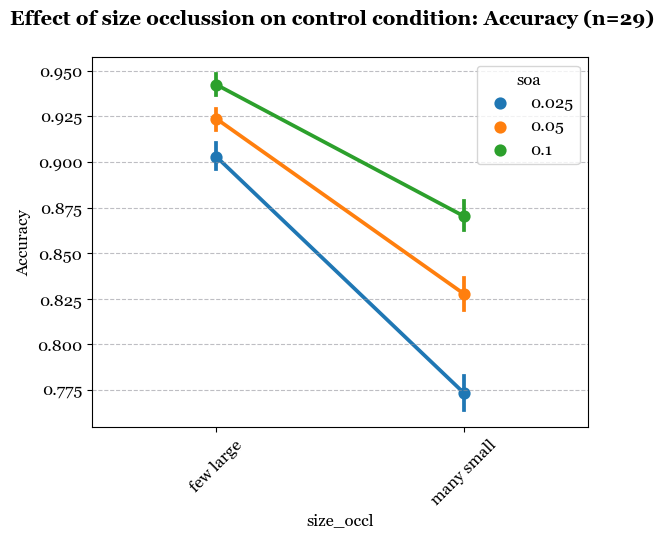

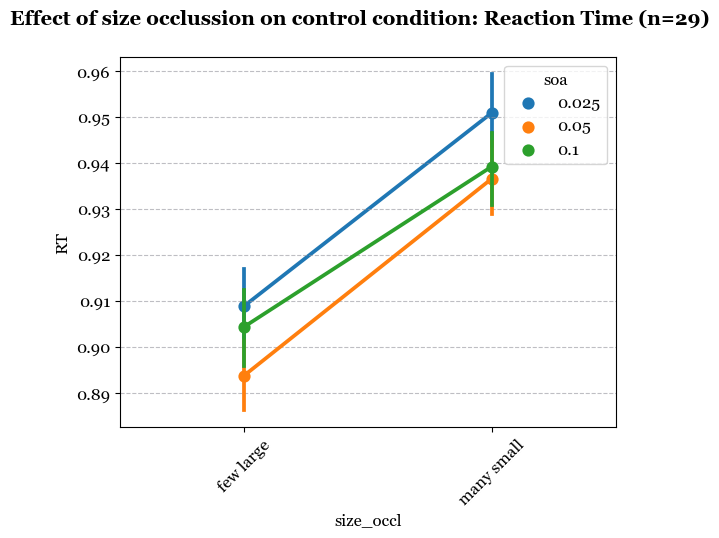

In [8]:
# for each measure of performance separately
df1 = df#[ df["difficulty"] == "control"]
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df1
    elif dv == 'acc':
        data = df1
    plt.figure()
    plot = sns.pointplot(
        data = df1,
        y = dv,
        x = 'size_occl',
        #order = ['q','w','e','r','u','i','o','p'],
        hue = 'soa',
        palette = 'tab10',
        join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of size occlussion on control condition: Accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Effect of size occlussion on control condition: Reaction Time (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

### Checking Confusion Matrix on responses

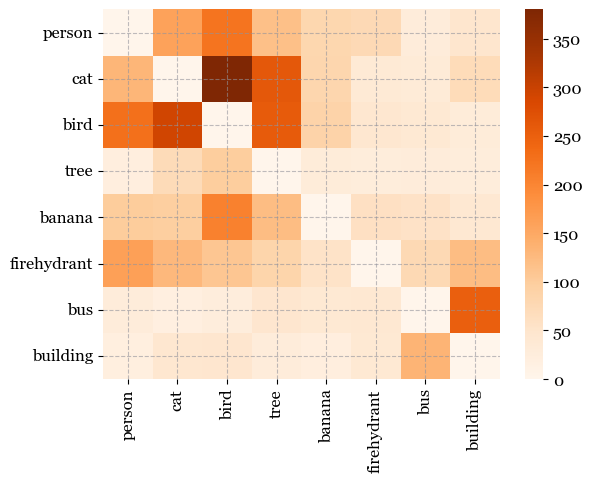

In [9]:
pred = df["choiced_category"]
true = df["category"]
cm = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
diag_idx = np.diag_indices(cm.shape[0]) # find the coordinates of the diagonal
zeroed_cm = cm # duplicate the diagonal
zeroed_cm[diag_idx] = 0 # zero out the values on it

main_cm = sns.heatmap(cm,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges")

## Confusion Matrices in Detail

### Defining CMs for SOA

In [10]:
df_soa25 = df[ df["soa"] == 0.025]
pred = df_soa25["choiced_category"]
true = df_soa25["category"]
cm_25 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_25.shape[0])
zeroed_cm_25 = cm_25
zeroed_cm_25[diag_idx] = 0

df_soa50 = df[ df["soa"] == 0.05]
pred = df_soa50["choiced_category"]
true = df_soa50["category"]
cm_50 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_50.shape[0])
zeroed_cm_50 = cm_50
zeroed_cm_50[diag_idx] = 0
#zero out the diagonal -end

df_soa100 = df[ df["soa"] == 0.1]
print(len(df_soa100))
pred = df_soa100["choiced_category"]
true = df_soa100["category"]
cm_100 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_100.shape[0])
zeroed_cm_100 = cm_100
zeroed_cm_100[diag_idx] = 0
#zero out the diagonal -end

13772


### Confusion Matrices for SOAs

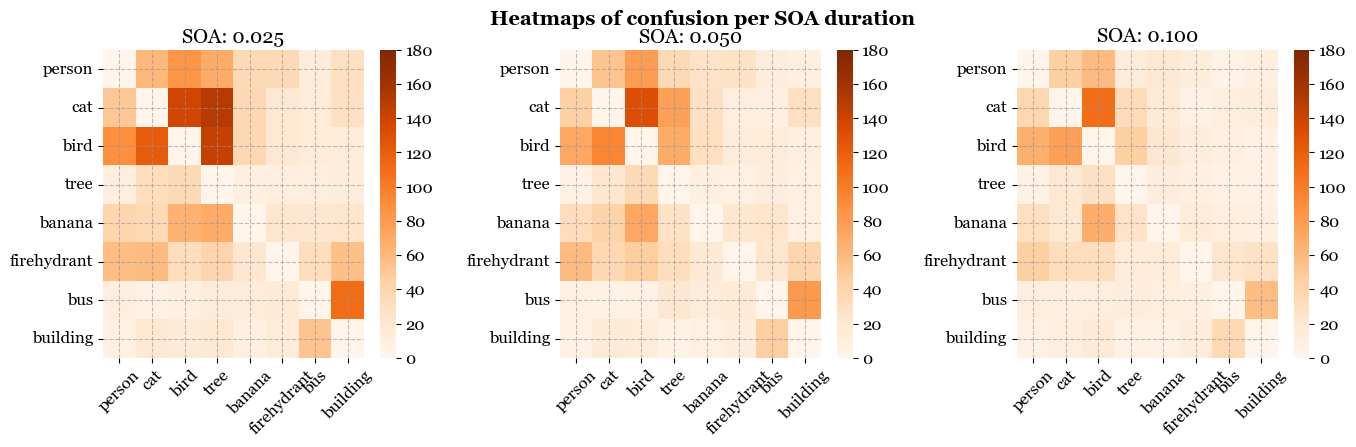

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per SOA duration")
axes[0].set_title("SOA: 0.025")

soa_25 = sns.heatmap(cm_25, vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("SOA: 0.050")
soa_50 = sns.heatmap(cm_50,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 45)

axes[2].set_title("SOA: 0.100")
soa_100 = sns.heatmap(cm_100,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap = "Oranges",
                 ax = axes[2])
axes[2].tick_params(axis='x', labelrotation = 45)

### Dimensionality Reduction

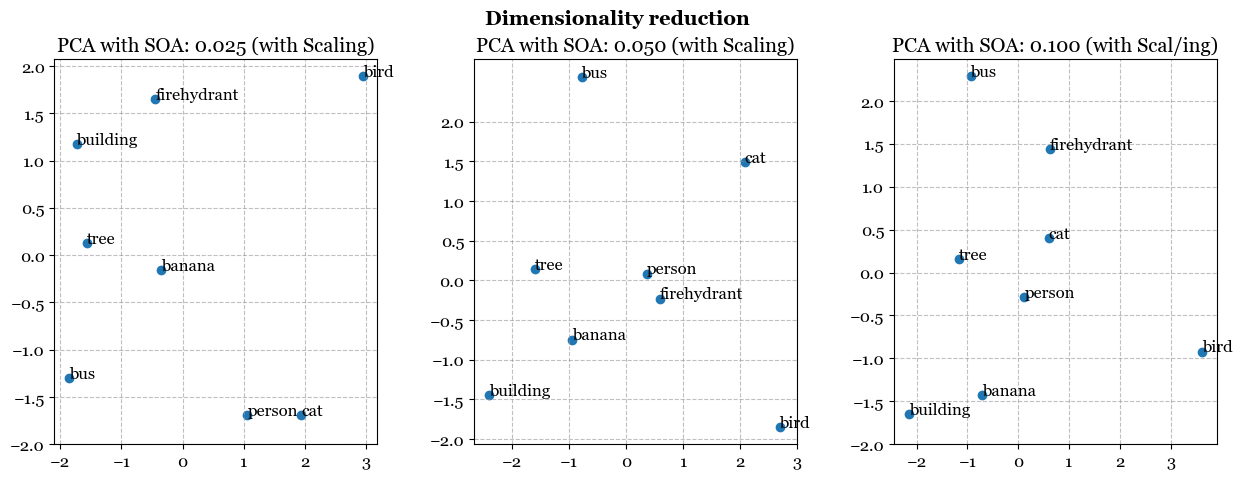

In [12]:
# Make a dictionary holding all confusion matrices
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']

# Scale the data using StandardScaler
# this is using a simple z = (x - u) / s formula
scaler = StandardScaler()

# Apply dimensionality reduction techniques
dim_reduction_methods = {
    #'t-SNE': TSNE(n_components=2, random_state=42, perplexity=5),
    'PCA': PCA(n_components=2),
    #'UMAP': umap.UMAP(n_components=2, random_state=42),
    #'MDS': MDS(n_components=2, random_state=42),
}

# Plot the results
    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# For each model & each method make a visualisation and add it onto the figure
for i, (name, method) in enumerate(dim_reduction_methods.items()):
    # Apply dimensionality reduction without scaling
    reduced_matrix = method.fit_transform(scaler.fit_transform(cm_25))
    ax = axes[0]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} with SOA: 0.025 (with Scaling)')
    #Keep everything on same scale
    ax.set_xticks([-2, -1, 0, 1, 2, 3])
    ax.set_yticks([2, 1.5, 1.0, 0.5, 0, -0.5, -1.0, -1.5, -2.0])

    reduced_matrix = method.fit_transform(scaler.fit_transform(cm_50))
    ax = axes[1]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} with SOA: 0.050 (with Scaling)')
    #Keep everything on same scale
    ax.set_xticks([-2, -1, 0, 1, 2, 3])
    ax.set_yticks([2, 1.5, 1.0, 0.5, 0, -0.5, -1.0, -1.5, -2.0])
    
    reduced_matrix = method.fit_transform(scaler.fit_transform(cm_100))
    ax = axes[2]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} with SOA: 0.100 (with Scal/ing)')
    #Keep everything on same scale
    ax.set_xticks([-2, -1, 0, 1, 2, 3])
    ax.set_yticks([2, 1.5, 1.0, 0.5, 0, -0.5, -1.0, -1.5, -2.0])

plt.suptitle(f'Dimensionality reduction', fontweight = 'bold')
plt.show()

### Alternative PCA scaled on SOA

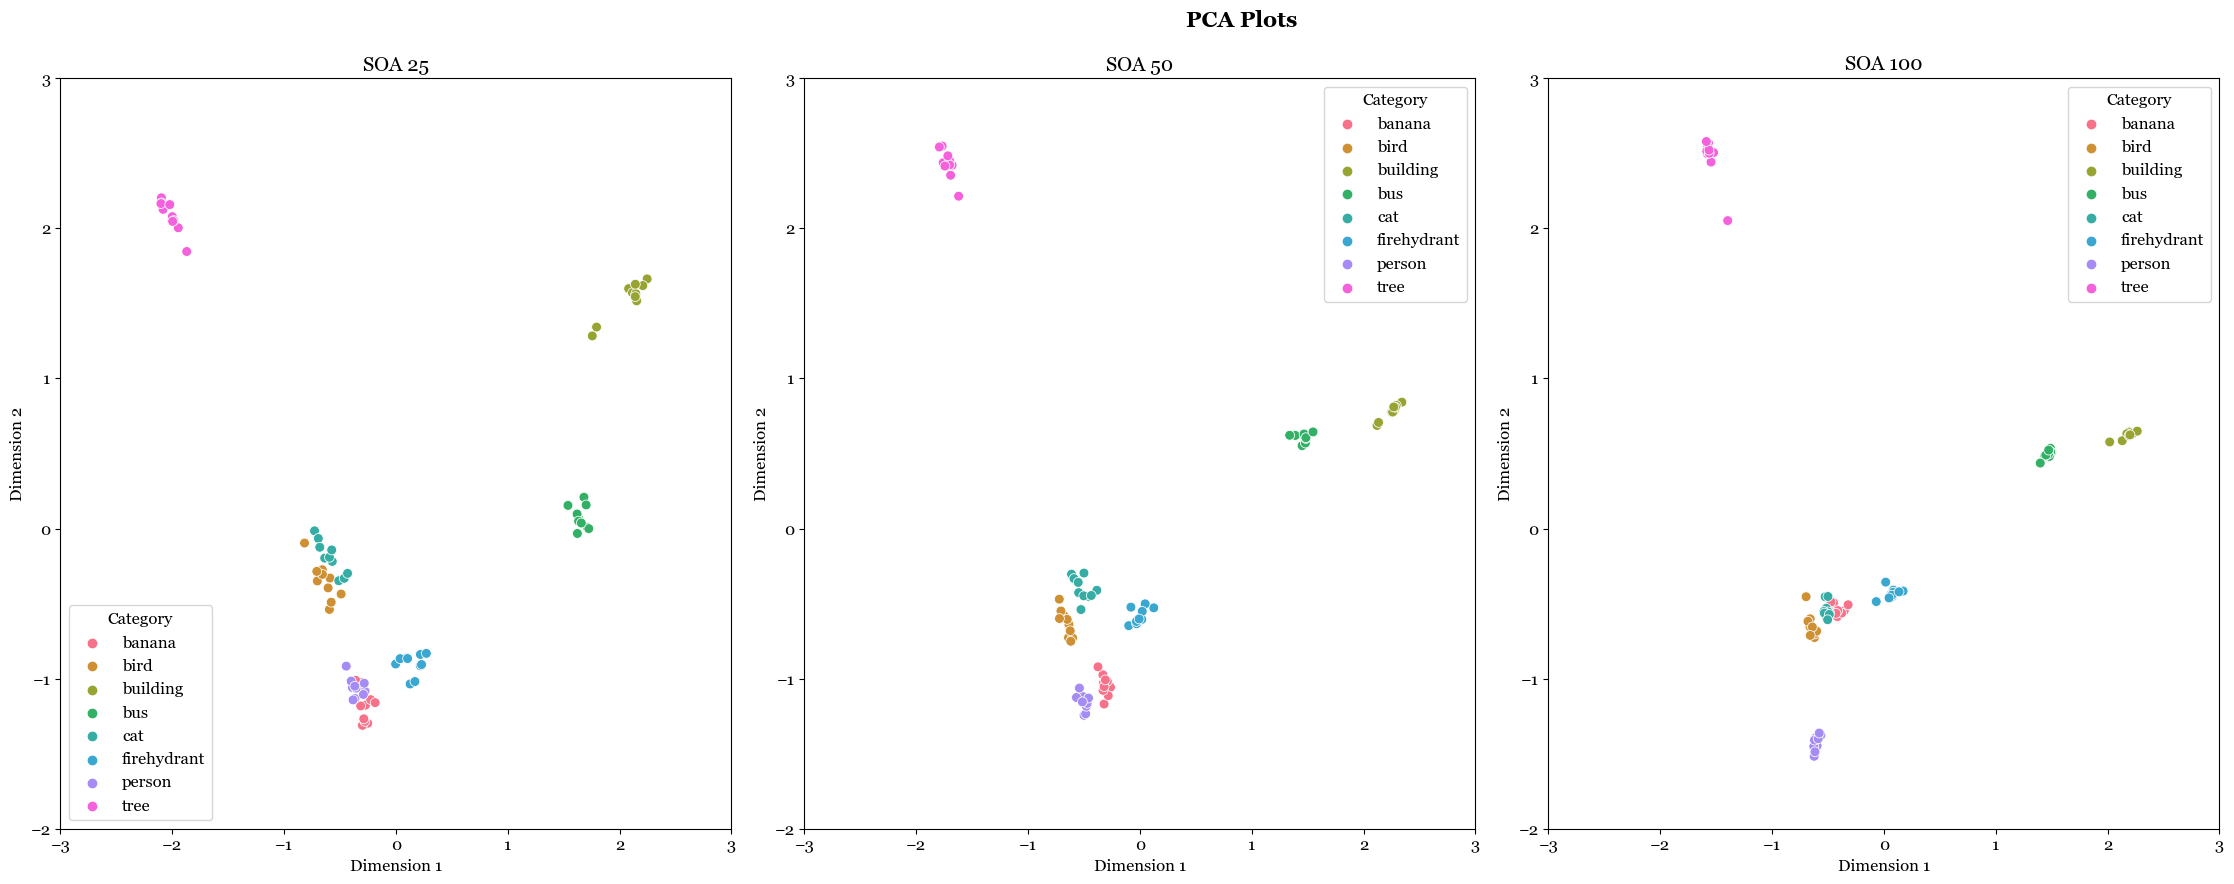

In [13]:
df['image'] = [ df['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df)) ]

im_labels = np.unique(df['image'])
df_soa25['image'] = [df_soa25['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df_soa25)) ]
df_soa50['image'] = [df_soa50['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df_soa50)) ]
df_soa100['image'] = [df_soa100['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df_soa100)) ]


# SOA 25
im_cm25 = pd.DataFrame(index=[im for im in im_labels])


# create model
# model = PCA(n_components=2).fit(im_cm100)

for l in labels:
    im_cm25[l] = [len(df_soa25.loc[(df_soa25['image']==im) & (df_soa25['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm25 = (im_cm25.sub(np.mean(im_cm25.values))).div(np.std(im_cm25.values))
# build the plot
pca_im_25 = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        # 'Dimension 1': model.transform(im_cm25)[:,0],
        # 'Dimension 2': model.transform(im_cm25)[:,1],
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm25)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm25)[:,1],
    }
)

# SOA 50
im_cm50 = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm50[l] = [len(df_soa50.loc[(df_soa50['image']==im) & (df_soa50['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm50 = (im_cm50.sub(np.mean(im_cm50.values))).div(np.std(im_cm50.values))
# build the plot
pca_im_50 = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        # 'Dimension 1': model.transform(im_cm50)[:,0],
        # 'Dimension 2': model.transform(im_cm50)[:,1],
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm50)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm50)[:,1],
    }
)

# SOA 100
im_cm100 = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm100[l] = [len(df_soa100.loc[(df_soa100['image']==im) & (df_soa100['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm100 = (im_cm100.sub(np.mean(im_cm100.values))).div(np.std(im_cm100.values))
# build the plot
pca_im_100 = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        # 'Dimension 1': model.transform(im_cm100)[:,0],
        # 'Dimension 2': model.transform(im_cm100)[:,1],
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm100)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm100)[:,1],
    }
)

# Set a custom color palette
category_colours = sns.color_palette('husl', n_colors=len(pca_im_25['Category'].unique()))

# Image-wise
fig, axes = plt.subplots(1, 3, figsize=(25, 9))

legend_handles = []  # To store legend handles for creating a single legend

for i, (pca_df, soa_value) in enumerate(zip([pca_im_25, pca_im_50, pca_im_100], [25, 50, 100])):
    scatterplot = sns.scatterplot(
        x='Dimension 1',
        y='Dimension 2',
        data=pca_df,
        ax=axes[i],
        hue='Category',
        palette=category_colours,
        s=50,  # Marker size
        edgecolor='w',  # White marker edges for better visibility
    )
    axes[i].set_ylim(-2, 3)
    axes[i].set_xlim(-3, 3)
    axes[i].grid(False)  # Add grid lines
    axes[i].set_title(f'SOA {soa_value}')

    # Extract legend handles for the first subplot
    if i == 0:
        handles, labels = axes[i].get_legend_handles_labels()
        legend_handles.extend(handles)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])

# Add overall title
plt.suptitle('PCA Plots', fontweight='bold', fontsize=16)

plt.show()

## Sensibility

Here we define functions to calculate the sensitivity index (or discrimination index) d' of our data. This index is the difference between the z-scores of the hit rate and false alarm rate of a given set of data. We take it category by category.

In [14]:
def find_hit(data, category):
  """
  Calculates the hit rate for a given category of the eight possible.

  Args:
    data: The DataFrame containing the data.
    category: The given category.

  Returns:
    hit_rate (float): the corresponding hit rate.
  """
  
  hits = np.sum(data.loc[data['category']==category, 'acc'])
  trials = len(data.loc[data['category']==category])

  hit_rate = hits / trials

  return hit_rate

def find_fa(data, category):
  """
  Calculates the false alarm for a given category of the eight possible. Note that this
  rate is corrected for the number of categories.

  Args:
    data: The DataFrame containing the data.
    category: The given category.

  Returns:
    false_alarm_rate (float): the corresponding false alarm rate.
  """
  
  false_alarms = len(data.loc[(data['choiced_category']==category) & (data['category']!=category)])
  n_trials = len(data.loc[(data['category']!=category)])

  false_alarm_rate = false_alarms / n_trials

  return false_alarm_rate

def d_prime(data, category):
  """
  Calculates the discrimination index (d') of a given category given the hit rate,
  false alarm rate, and number of categories.

  Args:
    data (df): dataframe with variables 'category' and 'prediction'
    category (str): name of a category

  Returns:
    d (float): the discrimination index (d') of the input category.
  """
  
  hit_rate = find_hit(data, category)
  false_alarm_rate = find_fa(data, category)

  z_hit = stats.norm.ppf(hit_rate)
  z_fa = stats.norm.ppf(false_alarm_rate)
  
  return z_hit - z_fa

In [15]:
# make a table with the categories and their associated d primes
dprime = pd.DataFrame({
    'category': [category for category in labels],
    'd prime': [d_prime(df, category) for category in labels]
})
# print the results
print(dprime)

      category   d prime
0       banana  3.409690
1         bird  2.754041
2     building  3.646199
3          bus  3.645748
4          cat  2.868270
5  firehydrant  3.428775
6       person  3.144686
7         tree  3.516284


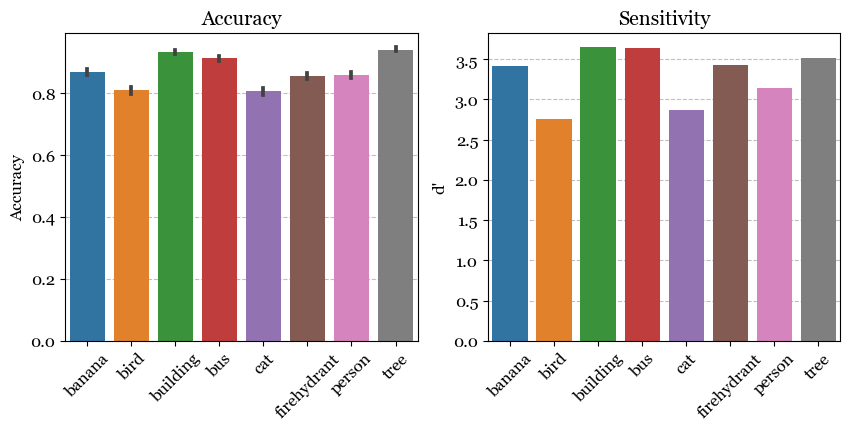

In [16]:
f = plt.figure(figsize = (10,4))
# accuracy plot
f.add_subplot(121)
acc_plot = sns.barplot(data = df, y = 'acc', x = 'category', order = labels, zorder = 2)
plt.xticks(rotation = 45)
acc_plot.set(xlabel = None, ylabel = 'Accuracy', title = 'Accuracy')
# sensitivity plot
f.add_subplot(122)
sen_plot = sns.barplot(data = dprime, y = 'd prime', x = 'category', order = labels, zorder = 2)
sen_plot.set(xlabel = None, ylabel = 'd\'', title = 'Sensitivity')
plt.xticks(rotation = 45)
plt.show()

### RT-Masking Effect Analysis

In [17]:
#Getting the average RT for each condition
#inialize new df taking the only correct responses for to get averages of each condition
rt_mask_df = df_correct
#many small_control average RT
rteff_manysmall_control = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "many small") & (rt_mask_df['difficulty'] == "control") ])
#many small_low average RT
rteff_manysmall_low = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "many small") & (rt_mask_df['difficulty'] == "low") ])
#many small_high average RT
rteff_manysmall_high = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "many small") & (rt_mask_df['difficulty'] == "high") ])
#fewlarge_control average RT
rteff_fewlarge_control = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "few large") & (rt_mask_df['difficulty'] == "control") ])
#fewlarge_low average RT
rteff_fewlarge_low = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "few large") & (rt_mask_df['difficulty'] == "low") ])
#fewlarge_high average RT
rteff_fewlarge_high = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "few large") & (rt_mask_df['difficulty'] == "high") ])

In [18]:
#Getting the accuracy differences between SOA.025 and SOA.100
acc_mask_df = df
#Initalize the accuracy rates
totalT = acc_mask_df.groupby(['pt_num', 'difficulty', 'size_occl', 'soa', ], as_index=False)['acc'].count()
correctT = acc_mask_df.groupby(['pt_num', 'difficulty', 'size_occl', 'soa'], as_index=False)['acc'].sum()
totalT['acc'] = ((correctT['acc']/totalT['acc'].round(3)))
#Accuracy difference for manysmall control
acceff_manysmall_control = statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.1) ])
#Accuracy difference for manysmall low
acceff_manysmall_low = statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.1) ])
#Accuracy difference for manysmall high
acceff_manysmall_high = statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.1) ])
#Accuracy difference for fewlarge control
acceff_fewlarge_control = statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.1) ])
#Accuracy difference for fewlarge low
acceff_fewlarge_low = statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.1) ])
#Accuracy difference for fewlarge high
acceff_fewlarge_high = statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.1) ])

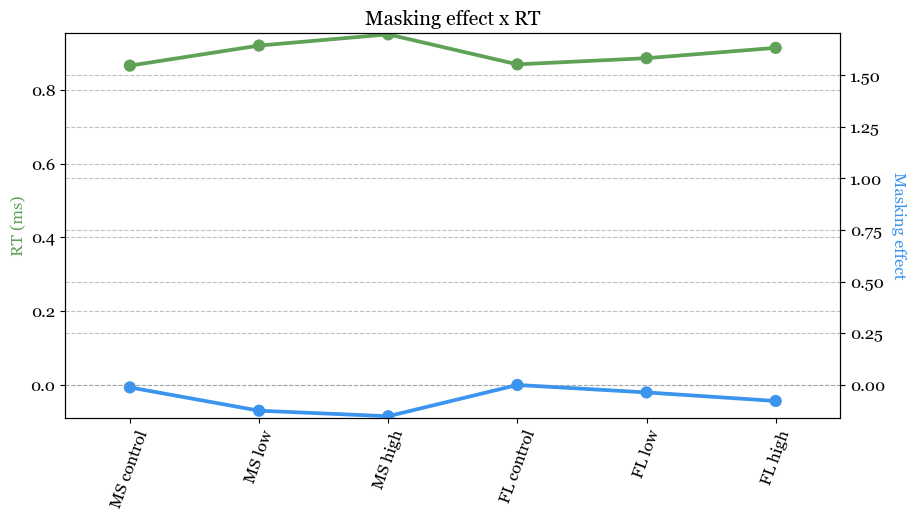

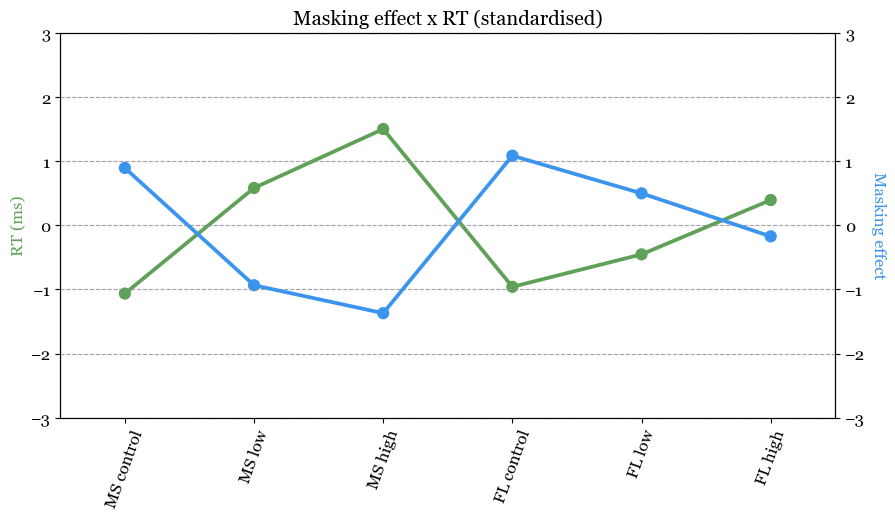

-0.976305504882587
0.0008354922587826954


In [19]:
tasks = {
    # here you could (not mandatory) list the tasks and the names
    # to display them with, for instance:
    'manysmall_control': 'MS control',
    'manysmall_low': 'MS low',
    'manysmall_high': 'MS high',
    'fewlarge_control': 'FL control',
    'fewlarge_low': 'FL low',
    'fewlarge_high': 'FL high'
    # this will be used to plot
}

tasks_1 = [
    # here you could (not mandatory) list the tasks and the names
    # to display them with, for instance:
    'MS control',
    'MS low',
    'MS high',
    'FL control',
    'FL low',
    'FL high'
    # this will be used to plot
    ]

# extract the masking effect and RT per task
acc_lst = [acceff_manysmall_control, acceff_manysmall_low, acceff_manysmall_high, acceff_fewlarge_control, acceff_fewlarge_low, acceff_fewlarge_high]
rt_lst = [rteff_manysmall_control, rteff_manysmall_low, rteff_manysmall_high, rteff_fewlarge_control, rteff_fewlarge_low, rteff_fewlarge_high]
# here you make a df with 6 rows, one for each condition, and
# you extract the masking effect and RT for each condition
mask_rt_df =pd.DataFrame(list(zip(tasks_1, acc_lst, rt_lst)),
               columns =['task', 'masking effect', 'RT'])

#mask_rt_df = pd.DataFrame({
#    'task' : ['Many_small_Control', 'Many_small_Low', 'Many_small_High', 'Few_large_Control', 'Few_large_Low', 'Few_large_High']
#    'masking effect': [int(acceff_manysmall_control, acceff_manysmall_low, acceff_manysmall_high, acceff_fewlarge_control, acceff_fewlarge_low, acceff_fewlarge_high]
#    'RT' : [rteff_manysmall_control, rteff_manysmall_low, rteff_manysmall_high, rteff_fewlarge_control, rteff_fewlarge_low, rteff_fewlarge_high]
#})


# Assuming tri_1 is your original DataFrame
# Calculate the mean and standard deviation of the columns 'RT' and 'masking effect'
mean_RT = mask_rt_df['RT'].mean()
std_RT = mask_rt_df['RT'].std()
mean_masking_effect = mask_rt_df['masking effect'].mean()
std_masking_effect = mask_rt_df['masking effect'].std()

# Create std_tri_1 with standardized values
mask_rt_df_std = pd.DataFrame()

# Apply the (x-m)/s formula to each column
mask_rt_df_std['RT'] = (mask_rt_df['RT'] - mean_RT) / std_RT
mask_rt_df_std['masking effect'] = (mask_rt_df['masking effect'] - mean_masking_effect) / std_masking_effect

# Copy the 'task' column from tri_1 to std_tri_1
mask_rt_df_std['task'] = mask_rt_df['task']


# correlate the results

corr, p_value = pearsonr(mask_rt_df['RT'].values, mask_rt_df['masking effect'].values)


### Plot the results

# create a function to align the axes of our twin graphs

def align_yaxis(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = (ax1, ax2)
    extrema = [ax.get_ylim() for ax in axes]
    tops = [extr[1] / (extr[1] - extr[0]) for extr in extrema]
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [list(reversed(l)) for l in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    b_new_t = extrema[0][0] + tot_span * (extrema[0][1] - extrema[0][0])
    t_new_b = extrema[1][1] - tot_span * (extrema[1][1] - extrema[1][0])
    axes[0].set_ylim(extrema[0][0], b_new_t)
    axes[1].set_ylim(t_new_b, extrema[1][1])

# plot the resulting vectors without standardisation, then with it

# make a twin bar plot
f = plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(111)
plt.xticks(rotation=70)
ax2 = ax1.twinx()

# RT plot
rt_plot = sns.pointplot(
    y = 'RT', 
    x = 'task', 
    data=mask_rt_df,
        color='#5ea157', 
    #alpha = 0.7, 
    ax = ax1
)
rt_plot.set(title= 'Masking effect x RT', ylabel='RT (ms)', xlabel=None)
rt_plot.set_xticklabels(tasks.values())
ax1.yaxis.label.set_color('#5ea157') #setting up Y-axis label color to green

# masking effect plot
m_plot = sns.pointplot(
    y = 'masking effect', 
    x = 'task', 
    data=mask_rt_df, 
    #alpha = 0.7, 
    color='#3b94ed',
    ax=ax2
)
m_plot.set(xlabel = None)
ax2.set_ylabel('Masking effect', rotation = 270, labelpad = 15)
m_plot.set_xticklabels(tasks.values()) # remove x tick labels here
ax2.yaxis.label.set_color('#3b94ed')

align_yaxis(ax1, ax2)
#plt.savefig(r'./corr_RT_mask/barplot_rt_mask.png')
plt.show()



# Making the graph again
f = plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(111)
plt.xticks(rotation=70)
ax2 = ax1.twinx()

# RT plot
rt_plot = sns.pointplot(
    y = 'RT', 
    x = 'task', 
    data=mask_rt_df_std, 
    color='#5ea157', 
    #alpha = 0.7, 
    ax = ax1
)
rt_plot.set(title= 'Masking effect x RT (standardised)', ylabel='RT (ms)', xlabel=None)
ax1.yaxis.label.set_color('#5ea157')
ax1.set_ylim(-3, 3)

# masking effect plot
m_plot = sns.pointplot(
    y = 'masking effect', 
    x = 'task', 
    data=mask_rt_df_std, 
    #alpha = 0.7, 
    color='#3b94ed',
    ax=ax2
)
m_plot.set(xlabel = None)
m_plot.set_xticklabels([])
ax2.set_ylabel('Masking effect', rotation = 270, labelpad = 15)
ax2.set_xticklabels(tasks.values())
ax2.yaxis.label.set_color('#3b94ed')
ax2.set_ylim(-3, 3)

# align the axes
align_yaxis(ax1, ax2)
#plt.savefig(r'./corr_RT_mask/std_barplot_rt_mask.png')
plt.show()
print(corr)
print(p_value)